In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv(r"C:\Users\janani\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [45]:
df.shape

(200, 5)

In [46]:
df.Gender.value_counts()


Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

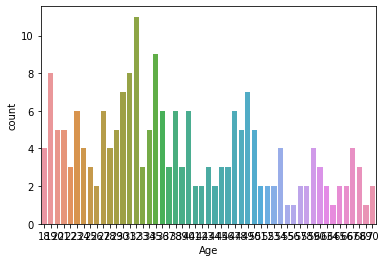

In [47]:
sns.countplot(x=df['Age']) 

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

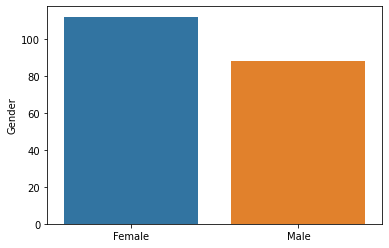

In [48]:
sns.barplot(df.Gender.value_counts().index,df.Gender.value_counts())

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

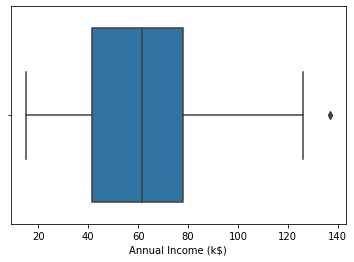

In [49]:


sns.boxplot(df['Annual Income (k$)'])



C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID'>

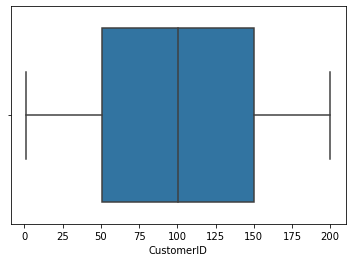

In [50]:
sns.boxplot(df['CustomerID'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

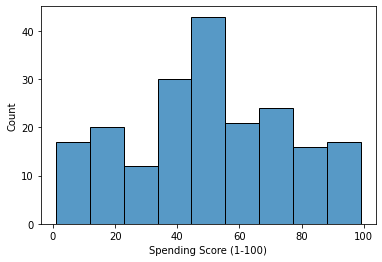

In [51]:


sns.histplot(df['Spending Score (1-100)'])


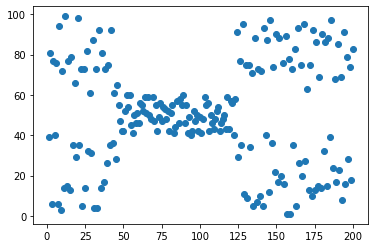

In [52]:
plt.scatter(df.CustomerID,df['Spending Score (1-100)'])

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

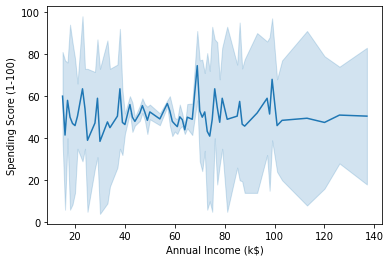

In [54]:
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'])


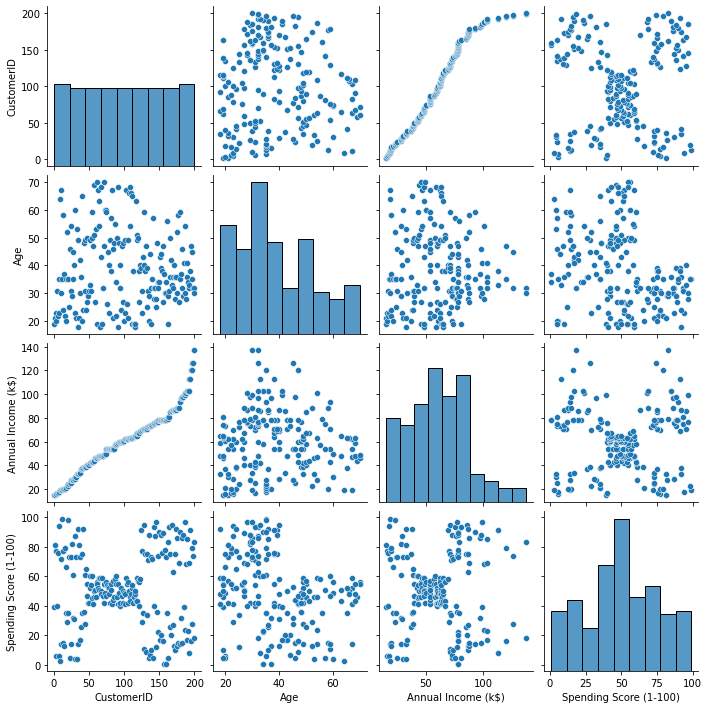

In [55]:


sns.pairplot(df)



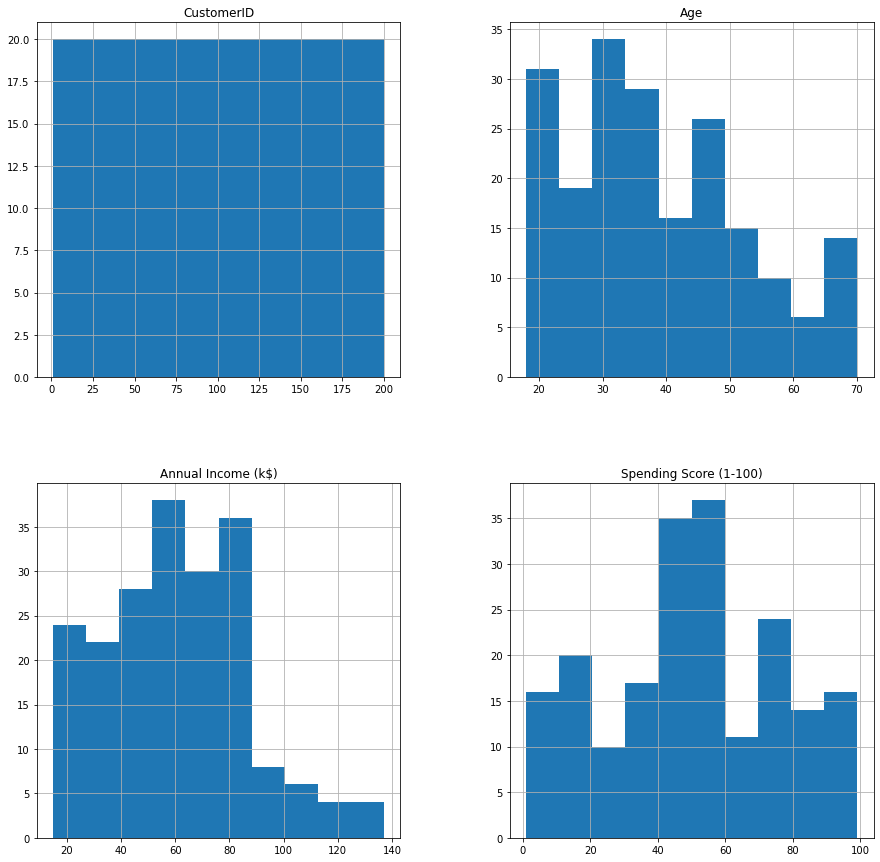

In [56]:
df.hist(figsize = (15,15))
plt.show()


In [57]:


df.describe()




,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [58]:
df.min()


CustomerID                     1
Gender                    Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)         1
dtype: object

In [59]:
df.max()


CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [60]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [61]:


df.isnull().any()



CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

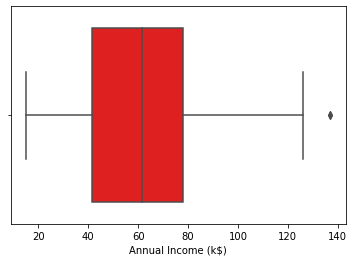

In [62]:
sns.boxplot(df['Annual Income (k$)'],color='red')


In [63]:


#IQR
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)



In [64]:


IQR = q3-q1




In [65]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [30]:
df = df[df['Annual Income (k$)'] < upper_limit]

C:\Users\janani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

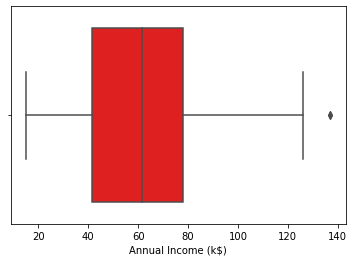

In [66]:
sns.boxplot(df['Annual Income (k$)'],color='red')

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
encoder=LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(df)
x[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01639344, 0.39795918]])

In [70]:
x = df.iloc[:, [3, 4]].values 

In [71]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [72]:
KMeans(n_clusters=3)

KMeans(n_clusters=3)

C:\Users\janani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


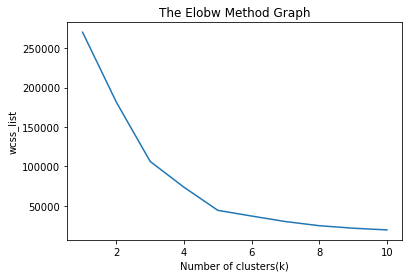

In [73]:
from sklearn.cluster import KMeans  
wcss_list= []     
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [74]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

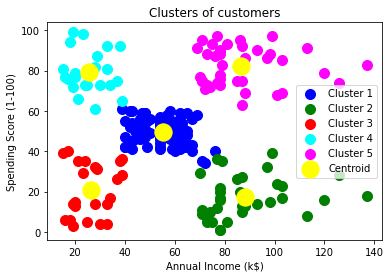

In [75]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 